# Boltzmann Machine

In [1]:
import time

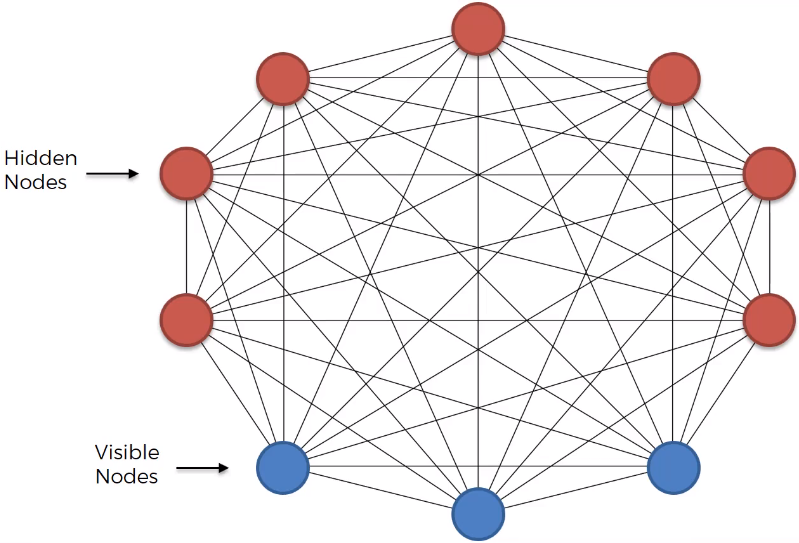

### Start of execution

In [2]:
start = time.time()

# 1. Import Libraries

In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale, OneHotEncoder

# 2. Load Datasets

In [4]:
digits = load_digits()

In [5]:
X = digits.data
Y = digits.target

In [6]:
X_scaled = minmax_scale(X, feature_range=(0, 1))

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, Y, test_size = 0.33, random_state = 42)

In [8]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, random_state = 42)

In [9]:
X_train.shape

(1203, 64)

In [10]:
X_val.shape

(297, 64)

In [11]:
X_test.shape

(297, 64)

# 3. Hiperparameter Tuning

In [12]:
all_n_epochs = [5, 10, 15, 20, 25, 30, 35, 40]
all_n_components = [(5*i + 20) for i in range(40 + 1)]

In [13]:
col_n_epochs = []
col_n_components = []
col_acc_macro = []

In [14]:
for n_epochs in all_n_epochs:
  for n_components in all_n_components:

    rbm = BernoulliRBM(
        n_components = n_components,
        learning_rate = 0.02,
        n_iter = n_epochs,
        random_state = 42,
        verbose = False
        )

    classifier = LogisticRegression(
        max_iter = 500
        )

    pipeline = Pipeline(steps=[('rbm', rbm), ('classifier', classifier)])

    pipeline.fit(X_train, y_train)

    y_val_pred = pipeline.predict(X_val)

    acc_macro = ((y_val_pred == y_val)*1).mean()

    col_n_epochs.append(n_epochs)
    col_n_components.append(n_components)
    col_acc_macro.append(acc_macro)

    print('n_epochs:', n_epochs)
    print('n_components:', n_components)
    print('-'*70)

n_epochs: 5
n_components: 20
----------------------------------------------------------------------
n_epochs: 5
n_components: 25
----------------------------------------------------------------------
n_epochs: 5
n_components: 30
----------------------------------------------------------------------
n_epochs: 5
n_components: 35
----------------------------------------------------------------------
n_epochs: 5
n_components: 40
----------------------------------------------------------------------
n_epochs: 5
n_components: 45
----------------------------------------------------------------------
n_epochs: 5
n_components: 50
----------------------------------------------------------------------
n_epochs: 5
n_components: 55
----------------------------------------------------------------------
n_epochs: 5
n_components: 60
----------------------------------------------------------------------
n_epochs: 5
n_components: 65
----------------------------------------------------------------------


In [15]:
df_ht = pd.DataFrame()
df_ht['n_epochs'] = col_n_epochs
df_ht['n_components'] = col_n_components
df_ht['acc_macro'] = col_acc_macro

In [16]:
df_ht.iloc[[df_ht['acc_macro'].argmax()]]

,n_epochs,n_components,acc_macro
305,40,110,0.858586


In [17]:
n_epochs = df_ht.iloc[[df_ht['acc_macro'].argmax()]]['n_epochs'].iloc[0]
n_components = df_ht.iloc[[df_ht['acc_macro'].argmax()]]['n_components'].iloc[0]

In [18]:
n_epochs, n_components

(40, 110)

# Final training

In [19]:
rbm = BernoulliRBM(
        n_components = n_components,
        learning_rate = 0.02,
        n_iter = n_epochs,
        random_state = 42,
        verbose = False
        )

In [20]:
classifier = LogisticRegression(
        max_iter = 500
        )

In [21]:
pipeline = Pipeline(steps=[('rbm', rbm), ('classifier', classifier)])

In [22]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('rbm',
                 BernoulliRBM(learning_rate=0.02, n_components=110, n_iter=40,
                              random_state=42, verbose=False)),
                ('classifier', LogisticRegression(max_iter=500))])

In [23]:
y_train_pred = pipeline.predict(X_train)
y_val_pred = pipeline.predict(X_val)
y_test_pred = pipeline.predict(X_test)

### a. Train

In [24]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           1       0.78      0.79      0.78       127
           2       0.84      0.81      0.82       125
           3       0.84      0.83      0.84       127
           4       0.95      0.93      0.94       117
           5       0.90      0.90      0.90       109
           6       0.95      0.98      0.96       124
           7       0.83      0.96      0.89       117
           8       0.82      0.70      0.76       122
           9       0.74      0.75      0.74       112

    accuracy                           0.86      1203
   macro avg       0.86      0.86      0.86      1203
weighted avg       0.86      0.86      0.86      1203



### b. Validation

In [25]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.85      0.68      0.76        25
           2       0.76      0.89      0.82        28
           3       0.94      0.77      0.85        22
           4       0.97      0.94      0.95        33
           5       0.97      0.78      0.86        45
           6       0.93      1.00      0.97        28
           7       0.88      0.97      0.92        30
           8       0.62      0.69      0.65        26
           9       0.74      0.86      0.80        37

    accuracy                           0.86       297
   macro avg       0.87      0.86      0.86       297
weighted avg       0.87      0.86      0.86       297



### c. Test

In [26]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.81      0.70      0.75        30
           2       0.81      0.92      0.86        24
           3       0.84      0.79      0.82        34
           4       0.85      0.94      0.89        31
           5       0.82      0.64      0.72        28
           6       1.00      0.93      0.96        29
           7       0.88      0.94      0.91        32
           8       0.72      0.69      0.71        26
           9       0.63      0.77      0.70        31

    accuracy                           0.83       297
   macro avg       0.83      0.83      0.83       297
weighted avg       0.84      0.83      0.83       297



### End of execution

In [27]:
end = time.time()

In [28]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 4 minutes and 15 seconds.
